In [70]:
from simpful import *

FS = FuzzySystem()

# color [green, yellow, red]
color1 = FuzzySet(function=InvSigmoid_MF(3, 1), term="green")
color2 = FuzzySet(function=Triangular_MF(0, 4.5, 9), term="yellow")
color3 = FuzzySet(function=Sigmoid_MF(6, 1), term="red")
FS.add_linguistic_variable("color", LinguisticVariable(
    [color1, color2, color3], universe_of_discourse=[0, 9], concept="color"))

# softness [soft, medium, hard]
softness1 = FuzzySet(function=InvSigmoid_MF(3, 2), term="soft")
softness2 = FuzzySet(function=Triangular_MF(3, 4.5, 6), term="medium")
softness3 = FuzzySet(function=Sigmoid_MF(6, 2), term="hard")
FS.add_linguistic_variable("softness", LinguisticVariable(
    [softness1, softness2, softness3], universe_of_discourse=[0, 9], concept="softness"))

# size [small, medium, large, extra large]
size1 = FuzzySet(function=InvSigmoid_MF(3, 3), term="small")
size2 = FuzzySet(function=Triangular_MF(3, 4.5, 7), term="medium")
size3 = FuzzySet(function=Triangular_MF(5, 7.5, 9), term="large")
size4 = FuzzySet(function=Sigmoid_MF(9, 3), term="extra large")
FS.add_linguistic_variable("size", LinguisticVariable(
    [size1, size2, size3, size4], universe_of_discourse=[0, 9], concept="size"))

# ripeness [unripe, ripe, overripe]
ripeness1 = FuzzySet(function=InvSigmoid_MF(3, 4), term="unripe")
ripeness2 = FuzzySet(function=Triangular_MF(3, 4.5, 6), term="ripe")
ripeness3 = FuzzySet(function=Sigmoid_MF(6, 4), term="overripe")
FS.add_linguistic_variable("ripeness", LinguisticVariable(
    [ripeness1, ripeness2, ripeness3], universe_of_discourse=[0, 9], concept="ripeness"))

FS.add_rules([
    "IF (softness IS hard) THEN (ripeness IS unripe)",
    "IF (softness IS medium) AND (color IS yellow) THEN (ripeness IS ripe)",
    "IF (softness IS medium) AND (color IS red) THEN (ripeness IS ripe)",
    "IF (softness IS medium) AND (color IS green) AND (size IS small) THEN (ripeness IS unripe)",
    "IF (softness IS medium) AND (color IS green) AND (size IS large) THEN (ripeness IS ripe)",
    "IF (softness IS soft) AND (color IS yellow) AND (size IS small) THEN (ripeness IS ripe)",
    "IF (softness IS soft) AND (color IS yellow) AND (size IS large) THEN (ripeness IS overripe)",
    "IF (softness IS soft) AND (color IS red) AND (size IS small) THEN (ripeness IS ripe)",
    "IF (softness IS soft) AND (color IS red) AND (size IS large) THEN (ripeness IS overripe)",
    "IF (softness IS soft) AND (color IS green) AND (size IS small) THEN (ripeness IS ripe)",
    "IF (softness IS soft) AND (color IS green) AND (size IS large) THEN (ripeness IS ripe)"
])

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



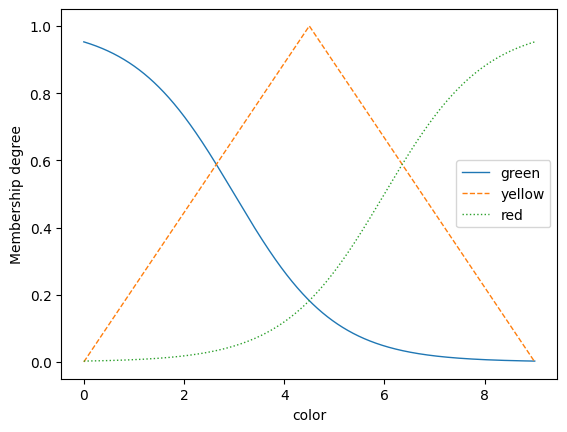

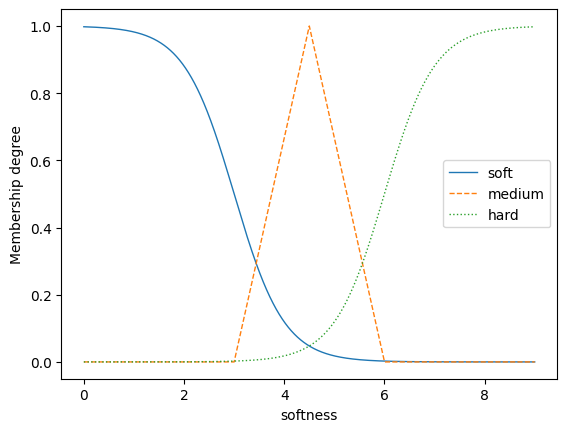

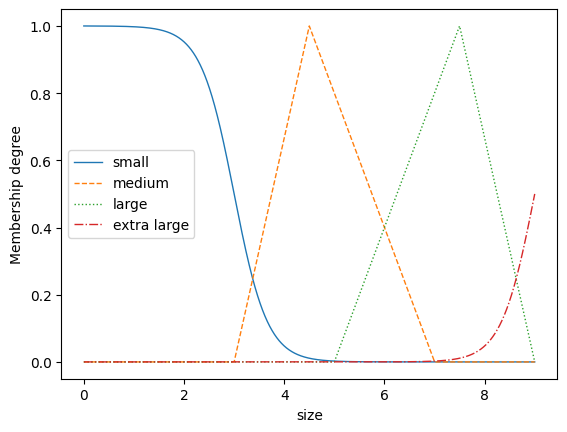

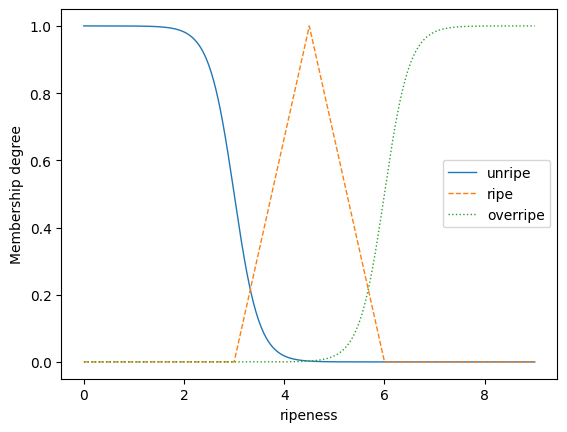

In [71]:
FS.plot_variable('color')
FS.plot_variable('softness')
FS.plot_variable('size')
FS.plot_variable('ripeness')

In [80]:
test_cases = [
    {"color": 1, "softness": 1, "size": 1},
    {"color": 3, "softness": 3, "size": 3},
    {"color": 5, "softness": 5, "size": 5},
    {"color": 7, "softness": 7, "size": 7},
    {"color": 9, "softness": 9, "size": 9},
    {"color": 9, "softness": 9, "size": 12}
]

for test_case in test_cases:
    FS.set_variable("color", test_case["color"])
    FS.set_variable("softness", test_case["softness"])
    FS.set_variable("size", test_case["size"])
    result = FS.inference()
    print("color: {}, softness: {}, size: {} - {}".format(test_case["color"], test_case["softness"], test_case["size"], 9-result["ripeness"]))


color: 1, softness: 1, size: 1 - 4.50027527370122
color: 3, softness: 3, size: 3 - 4.519707774853083
color: 5, softness: 5, size: 5 - 5.140720330914453
color: 7, softness: 7, size: 7 - 7.42626014164329
color: 9, softness: 9, size: 9 - 7.467119228277075
color: 9, softness: 9, size: 12 - 7.467119228277075
